In [1]:
# Loading the preprocessed text file. The file has all special characters and
# spaces removed, and all letters converted to lowercase.
    
with open('alice_preprocessed.txt', 'r', encoding='utf-8') as file:
    text = file.read()

SOCIAL GRAPH

Number of characters in the list = 20 <br>
Number of characters in the social graph = 12 <br>
Number of edges = 16

In [2]:
# Imports 

import networkx as nx
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities, girvan_newman, greedy_modularity_communities



In [3]:
# Character list

characters = [
    "alice", "the white rabbit", "the cheshire cat", "hatter",
    "queen of hearts", "the knave of hearts", "the caterpillar",
    "the mock turtle", "the gryphon", "the duchess", "the march hare",
    "the dodo", "the duchess's cook", "the king of hearts",
    "the dormouse", "the mouse", "the frog footman",
    "the duchess's baby", "the walrus", "the carpenter"
]


In [4]:
# Alias mapping for each character

name_variations = {
    "alice": "alice",
    "the white rabbit": "the white rabbit",
    "white rabbit": "the white rabbit",
    "rabbit": "the white rabbit",
    "rabbits": "the white rabbit",
    "the cheshire cat": "the cheshire cat",
    "cheshire cat": "the cheshire cat",
    "cat": "the cheshire cat",
    "hatter": "hatter",
    "hatters":"hatter",
    "queens": "queen of hearts",
    "queen": "queen of hearts",
    "knave": "the knave of hearts",
    "caterpillar": "the caterpillar",
    "absolem": "the caterpillar",
    "turtle": "the mock turtle",
    "gryphon": "the gryphon",
    "duchess": "the duchess",
    "the march hare": "the march hare",
    "hare": "the march hare",
    "the dodo": "the dodo",
    "dodo": "the dodo",
    "the duchess's cook": "the duchess's cook",
    "duchess's cook": "the duchess's cook",
    "the king of hearts": "the king of hearts",
    "king": "the king of hearts",
    "the dormouse": "the dormouse",
    "dormouse": "the dormouse",
    "the mouse": "the mouse",
    "mouse": "the mouse",
    "the frog footman": "the frog footman",
    "frog": "the frog footman",
    "the duchess's baby": "the duchess's baby",
    "baby": "the duchess's baby",
    "the walrus": "the walrus",
    "walrus": "the walrus",
    "the carpenter": "the carpenter",
    "carpenter": "the carpenter"
}


In [5]:
co_occurrences = defaultdict(int)


In [6]:
window_size = 50  # Window size of a few sentences 

for i in range(len(text)):
    for char in characters:
        char_full = name_variations.get(char, char)
        if char_full in text[i:i + window_size]:
            for other_char in characters:
                if char != other_char:
                    other_char_full = name_variations.get(other_char, other_char)
                    if other_char_full in text[i:i + window_size]:
                        co_occurrences[(char_full, other_char_full)] += 1


In [7]:
G = nx.Graph()

In [8]:
for (char1, char2), weight in co_occurrences.items():
    if weight > 0:  # Only adding edges if there is a co-occurrence
        G.add_edge(char1, char2, weight=weight) 

The number of edges in the graph is: 16


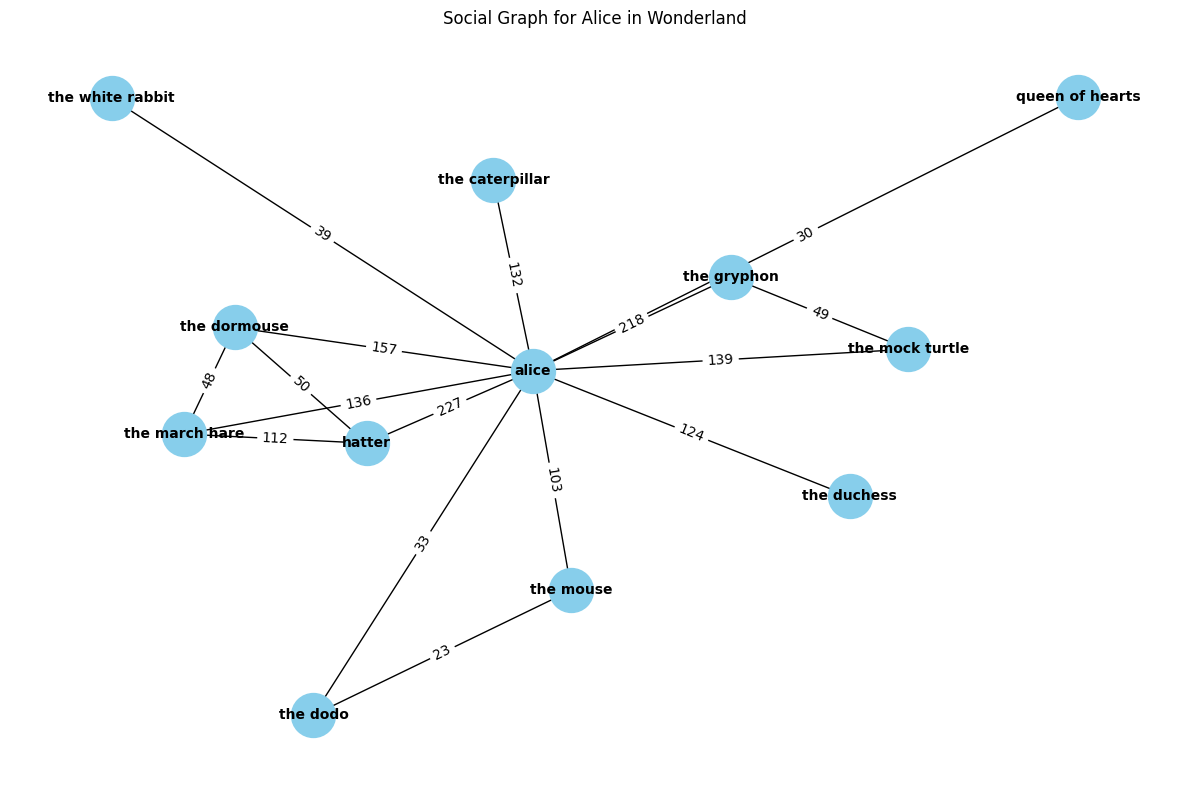

In [9]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')

# Drawing edges with weights as labels
nx.draw_networkx_edges(G, pos)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Drawing labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

num_edges = G.number_of_edges()
print(f"The number of edges in the graph is: {num_edges}")
plt.title("Social Graph for Alice in Wonderland")
plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)

In [11]:
main_protagonists_centrality = {}
for protagonist in characters:
    main_protagonists_centrality[protagonist] = {
        "Degree Centrality": degree_centrality.get(protagonist, 0),
        "Betweenness Centrality": betweenness_centrality.get(protagonist, 0),
        "Closeness Centrality": closeness_centrality.get(protagonist, 0),
        "PageRank": pagerank.get(protagonist, 0)
    }
    
for protagonist, centrality in main_protagonists_centrality.items():
    print(f"Centrality measures for {protagonist}:")
    for measure, value in centrality.items():
        print(f"{measure}: {value}")
    print()

Centrality measures for alice:
Degree Centrality: 1.0
Betweenness Centrality: 0.9090909090909091
Closeness Centrality: 1.0
PageRank: 0.38829648934392574

Centrality measures for the white rabbit:
Degree Centrality: 0.09090909090909091
Betweenness Centrality: 0.0
Closeness Centrality: 0.5238095238095238
PageRank: 0.02212047143926621

Centrality measures for the cheshire cat:
Degree Centrality: 0
Betweenness Centrality: 0
Closeness Centrality: 0
PageRank: 0

Centrality measures for hatter:
Degree Centrality: 0.2727272727272727
Betweenness Centrality: 0.0
Closeness Centrality: 0.5789473684210527
PageRank: 0.1081046373883378

Centrality measures for queen of hearts:
Degree Centrality: 0.09090909090909091
Betweenness Centrality: 0.0
Closeness Centrality: 0.5238095238095238
PageRank: 0.019900362645589392

Centrality measures for the knave of hearts:
Degree Centrality: 0
Betweenness Centrality: 0
Closeness Centrality: 0
PageRank: 0

Centrality measures for the caterpillar:
Degree Centrality: 

In [12]:
for protagonist in characters:
    if protagonist in G.nodes():
        ego_network = nx.ego_graph(G, protagonist)
        clustering_coefficient = nx.average_clustering(ego_network)
        print(f"Local clustering coefficient for {protagonist}: {clustering_coefficient}")
    else:
        print(f"Skipping {protagonist} as it is not found in the graph")

Local clustering coefficient for alice: 0.5909090909090909
Local clustering coefficient for the white rabbit: 0.0
Skipping the cheshire cat as it is not found in the graph
Local clustering coefficient for hatter: 1.0
Local clustering coefficient for queen of hearts: 0.0
Skipping the knave of hearts as it is not found in the graph
Local clustering coefficient for the caterpillar: 0.0
Local clustering coefficient for the mock turtle: 1.0
Local clustering coefficient for the gryphon: 1.0
Local clustering coefficient for the duchess: 0.0
Local clustering coefficient for the march hare: 1.0
Local clustering coefficient for the dodo: 1.0
Skipping the duchess's cook as it is not found in the graph
Skipping the king of hearts as it is not found in the graph
Local clustering coefficient for the dormouse: 1.0
Local clustering coefficient for the mouse: 1.0
Skipping the frog footman as it is not found in the graph
Skipping the duchess's baby as it is not found in the graph
Skipping the walrus as 

In [13]:
# Clique Percolation Method
k = 3
clique_communities = list(k_clique_communities(G, k))

print(f"Clique Percolation Method ({k}-cliques):")
for i, community in enumerate(clique_communities):
    print(f"Community {i + 1}: {community}")

Clique Percolation Method (3-cliques):
Community 1: frozenset({'the march hare', 'alice', 'hatter', 'the dormouse'})
Community 2: frozenset({'alice', 'the mouse', 'the dodo'})
Community 3: frozenset({'the gryphon', 'alice', 'the mock turtle'})


In [14]:
# Girvan Newman Method
gn_communities = girvan_newman(G)
gn_first_iteration_communities = next(gn_communities)

print("\nGirvan Newman Method:")
for i, community in enumerate(gn_first_iteration_communities):
    print(f"Community {i + 1}: {community}")



Girvan Newman Method:
Community 1: {'queen of hearts', 'the duchess', 'the white rabbit', 'hatter', 'the dormouse', 'the march hare', 'the dodo', 'the gryphon', 'alice', 'the mock turtle', 'the mouse'}
Community 2: {'the caterpillar'}


In [15]:
# Louvain algorithm (Modularity-based)
louvain_communities = greedy_modularity_communities(G)

print("\nLouvain algorithm (Modularity-based):")
for i, community in enumerate(louvain_communities):
    print(f"Community {i + 1}: {community}")



Louvain algorithm (Modularity-based):
Community 1: frozenset({'the duchess', 'queen of hearts', 'the gryphon', 'alice', 'the mock turtle', 'the caterpillar', 'the white rabbit'})
Community 2: frozenset({'the march hare', 'hatter', 'the dormouse'})
Community 3: frozenset({'the mouse', 'the dodo'})


Text(0.5, 1.0, 'Clique Percolation (3-cliques)')

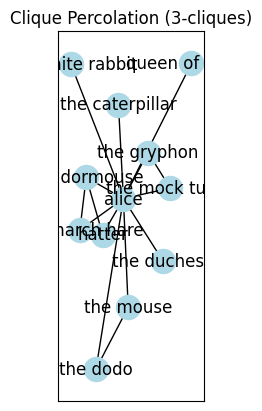

In [16]:
# Clique Percolation Method
plt.subplot(131)
nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True)
plt.title(f"Clique Percolation ({k}-cliques)")

Text(0.5, 1.0, 'Girvan Newman Method')

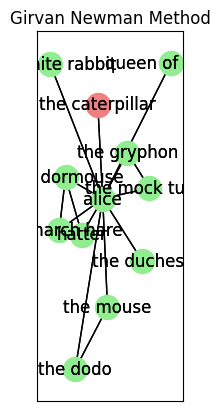

In [17]:
plt.subplot(132)
colors = ['lightgreen', 'lightcoral', 'lightyellow']
for i, community in enumerate(gn_first_iteration_communities):
    nx.draw_networkx(G, pos, nodelist=community, node_color=colors[i], with_labels=True)
plt.title("Girvan Newman Method")

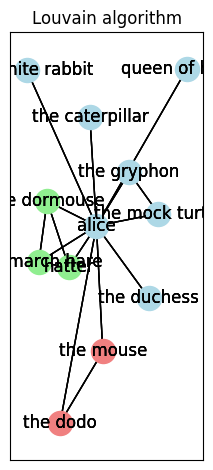

In [18]:
# Louvain algorithm (Modularity-based)
plt.subplot(133)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for i, community in enumerate(louvain_communities):
    nx.draw_networkx(G, pos, nodelist=community, node_color=colors[i], with_labels=True)
plt.title("Louvain algorithm")

plt.tight_layout()
plt.show()

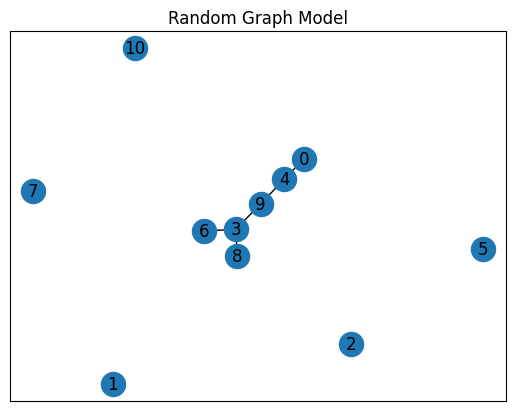

In [19]:

# Generating a random graph with 11 nodes and probability of edge creation p
random_graph = nx.fast_gnp_random_graph(11, 0.1)

nx.draw_networkx(random_graph, with_labels=True)
plt.title("Random Graph Model")
plt.show()


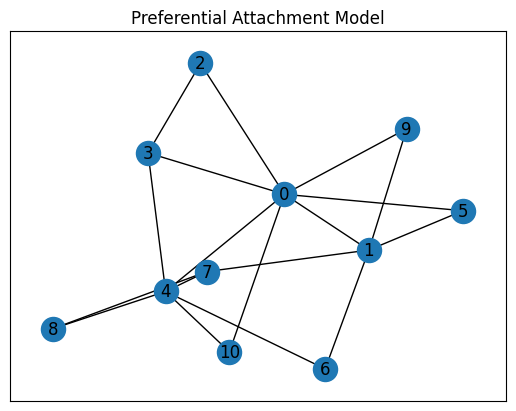

In [20]:

# Generating a Barabasi-Albert preferential attachment graph with 11 nodes and m edges to attach from each new node
preferential_attachment = nx.barabasi_albert_graph(11, 2) 

nx.draw_networkx(preferential_attachment, with_labels=True)
plt.title("Preferential Attachment Model")
plt.show()


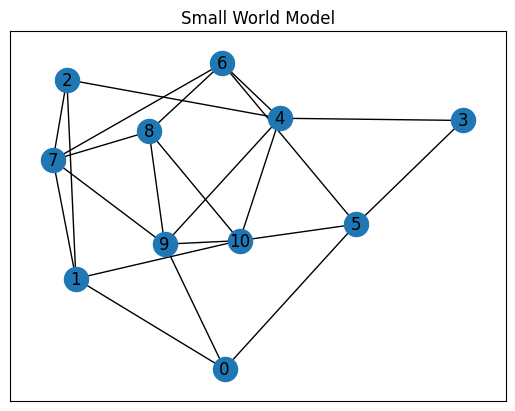

In [21]:

# Generating a Watts-Strogatz small world graph with 11 nodes, average degree k, and probability of rewiring p
small_world = nx.watts_strogatz_graph(11, 4, 0.3)

nx.draw_networkx(small_world, with_labels=True)
plt.title("Small World Model")
plt.show()


### ANALYSIS 

##### Alice:
Degree Centrality (1.0): Alice has the highest degree centrality, indicating she is directly connected to all other characters in the network.
Betweenness Centrality (0.91): Alice tends to be in the critical path of communication between characters.
Closeness Centrality (1.0): Alice has the highest closeness centrality, suggesting she can reach any other character most efficiently.
PageRank (0.39): Alice has a relatively high PageRank, indicating importance in the character network.

##### Hatter, March Hare, Dormouse, Mock Turtle, Gryphon, Mouse, Dodo:
These characters also show significant centrality measures (Degree, Closeness, and PageRank), indicating they are among the central characters in interactions, forming a group.
##### The Queen of Hearts and other characters:
The Queen of Hearts has relatively lower centrality measures compared to the above characters, indicating less centrality in the interactions within this network.
Characters like the Duchess, Caterpillar, and others have low or zero centrality measures, suggesting less direct interaction or involvement in the main character network.

From this analysis, Alice clearly stands out as the most central character in terms of her interactions with others. The Hatter, March Hare, Dormouse, Mock Turtle, Gryphon, Mouse, and Dodo form another interconnected group of characters with notable centrality. The Queen of Hearts seems to have less interaction or centrality within this network.


The social graph extracted from the text of "Alice in Wonderland" is fictional, based on a literary work, and is similar to a real-world social network. 

Real-World Properties in the Extracted Social Graph:

Local Clustering Coefficient: This metric indicates the degree to which nodes tend to cluster together.
Characters like the Hatter, Mock Turtle, Gryphon, Dormouse, Mouse, and Dodo have a local clustering coefficient of 1.0, suggesting they are part of tightly connected groups where each character has connections to every other character within these specific groups.
Alice has a relatively high local clustering coefficient (0.59), indicating a significant degree of clustering among the characters she interacts with.
Some characters, like the White Rabbit, the Queen of Hearts, and the Caterpillar, have a local clustering coefficient of 0.0, suggesting they have fewer mutual connections within their immediate environment.


Community Detection (Clique Percolation, Girvan Newman, Louvain Algorithm): These methods aim to detect communities or groups of highly interconnected nodes within the graph.
Communities found in the graph show clusters of characters that interact closely or frequently within the narrative. For instance, in the 3-clique community detected by the Clique Percolation Method, we see Alice connected with the March Hare, Hatter, Dormouse, Mock Turtle, Gryphon, Mouse, and Dodo, representing a cohesive group of interactions within the story.



